## Data Set Information:

The dataset was downloaded from https://catalog.data.gov/dataset/employee-compensation 

## Attribute Information:
Input variables:

1 - Organization Group Code

2 - Job Family Code

3 - Job Code

4 - Year Type

5 - Year

6 - Organization Group

7 - Department Code

8 - Department

9 - Union Code

10 - Union

11 - Job Family

12 - Job

13 - Employee Identifier

14 - Salaries

15 - Overtime

16 - Other Salaries

17 - Total Salary

18 - Retirement

19 - Health and Dental

20 - Other Benefits

21 - Total Benefits

22 - Total Compensation

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Import the dataset

dataset=pd.read_csv("Employee_Compensation.csv")

In [3]:
dataset.info

<bound method DataFrame.info of         Organization Group Code Job Family Code Job Code Year Type  Year  \
0                             1            1000     1021  Calendar  2013   
1                             1            1000     1023  Calendar  2013   
2                             1            1000     1031  Calendar  2013   
3                             1            1000     1054  Calendar  2013   
4                             1            1000     1062  Calendar  2013   
...                         ...             ...      ...       ...   ...   
446205                        4            2700     2736    Fiscal  2014   
446206                        4            2700     2736    Fiscal  2014   
446207                        4            2700     2736    Fiscal  2014   
446208                        4            2700     2736    Fiscal  2014   
446209                        4            2700     2736    Fiscal  2014   

       Organization Group Department Code           Dep

## Data Pre-Processing

In [4]:
#Numerise the Organization Group for further analysis

dataset=dataset.replace('Public Protection',0)
dataset=dataset.replace('Public Works, Transportation & Commerce',1)
dataset=dataset.replace('Human Welfare & Neighborhood Development',2)
dataset=dataset.replace('Community Health',3)
dataset=dataset.replace('Culture & Recreation',4)
dataset=dataset.replace('General Administration & Finance',5)
dataset=dataset.replace('General City Responsibilities',6)

#Drop the code features in dataset
dataset=dataset.drop(['Organization Group Code','Job Family Code','Job Code','Department Code','Union Code'],axis=1)

## Missing Value Ratio

In [5]:
# checking the percentage of missing values in each variable

dataset.isnull().sum()/len(dataset)*100

Year Type              0.000000
Year                   0.000000
Organization Group     0.000000
Department             0.000000
Union                  0.030479
Job Family             0.000000
Job                    0.000448
Employee Identifier    0.000224
Salaries               0.000224
Overtime               0.000224
Other Salaries         0.000224
Total Salary           0.000224
Retirement             0.000224
Health and Dental      0.000224
Other Benefits         0.000224
Total Benefits         0.000224
Total Compensation     0.000224
dtype: float64

In [6]:
#check if any are more than the threshold
null_percentages = dataset.isnull().sum()/len(dataset)*100

# saving column names in a variable
features = dataset.columns
feature = [ ]

for i in range(0,len(null_percentages)):
    if null_percentages[i]<=20:   #setting the threshold value, i.e 20%
        feature.append(features[i])

In [7]:
print(len(feature))
print(feature)

17
['Year Type', 'Year', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job', 'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits', 'Total Compensation']


In [8]:
#check the percentage of rows that have null values

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.0019510728923469165

In [9]:
#Since the percentage of null values is negligible we can drop those

dataset = dataset.dropna(axis=0)

In [10]:
#check the percentage of rows that have null values

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

0.0

## Variance Filter

In [11]:
#check the variance 

dataset.var()

C:\Users\16479\AppData\Local\Temp/ipykernel_119192/4111549166.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


Year                   7.196204e+00
Organization Group     2.450502e+00
Employee Identifier    4.305288e+14
Salaries               2.365285e+09
Overtime               1.861858e+08
Other Salaries         5.983780e+07
Total Salary           3.241469e+09
Retirement             1.174644e+08
Health and Dental      3.492835e+07
Other Benefits         1.412880e+07
Total Benefits         3.468783e+08
Total Compensation     5.490032e+09
dtype: float64

In [12]:
#Employee Identifier has the high variance and the contents are not meaningful for analysis, so we can safely drop this

dataset=dataset.drop(['Employee Identifier'],axis=1)

In [13]:
dataset.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


## High Correlation Filter

In [14]:
#checking the correlation

dataset.corr()

,Year,Organization Group,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
Year,1.000000,0.031794,0.183065,0.084262,0.005585,0.177332,0.201449,0.226007,0.154865,0.220200,0.191610
Organization Group,0.031794,1.000000,-0.184037,-0.287594,-0.223231,-0.256464,-0.227151,-0.213997,0.048561,-0.190290,-0.244897
Salaries,0.183065,-0.184037,1.000000,0.254590,0.292504,0.954980,0.934188,0.751508,0.723434,0.928098,0.967089
Overtime,0.084262,-0.287594,0.254590,1.000000,0.341907,0.503594,0.310270,0.289695,0.076303,0.287879,0.459320
Other Salaries,0.005585,-0.223231,0.292504,0.341907,1.000000,0.467674,0.320493,0.187309,0.054441,0.256926,0.423939
Total Salary,0.177332,-0.256464,0.954980,0.503594,0.467674,1.000000,0.915909,0.736833,0.643657,0.896704,0.993791
Retirement,0.201449,-0.227151,0.934188,0.310270,0.320493,0.915909,1.000000,0.772152,0.657613,0.959662,0.945002
Health and Dental,0.226007,-0.213997,0.751508,0.289695,0.187309,0.736833,0.772152,1.000000,0.627026,0.893201,0.790695
Other Benefits,0.154865,0.048561,0.723434,0.076303,0.054441,0.643657,0.657613,0.627026,1.000000,0.783468,0.691517
Total Benefits,0.220200,-0.190290,0.928098,0.287879,0.256926,0.896704,0.959662,0.893201,0.783468,1.000000,0.940384


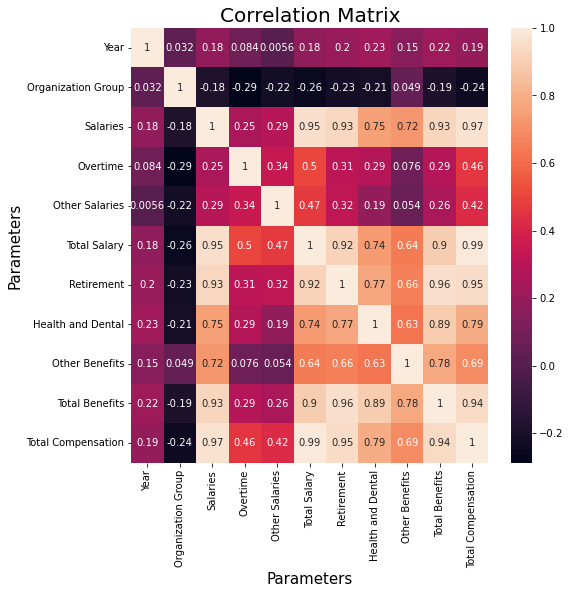

In [15]:
#Making a heatmap

plt.figure(figsize = (8, 8))
sns.heatmap(dataset.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.xlabel('Parameters', fontsize = 15) 
plt.ylabel('Parameters', fontsize = 15) 
plt.show()

In [16]:
#Drop the features which are more correlation as carry same information

dataset=dataset.drop(['Salaries','Overtime','Other Salaries','Retirement','Health and Dental','Other Benefits'],axis=1)

In [17]:
dataset.head()

,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Total Salary,Total Benefits,Total Compensation
0,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,57534.65,27747.13,85281.78
1,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,57678.50,22216.82,79895.32
2,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,63532.93,30116.78,93649.71
3,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,94215.92,40021.45,134237.37
4,Calendar,2013,0,ADP Adult Probation,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,5084.00,2428.31,7512.31


# CLASSIFICATION AND REGRESSION

First of All We will find the correlation Matrix and visualise it using heat map to findout which features are more correlated

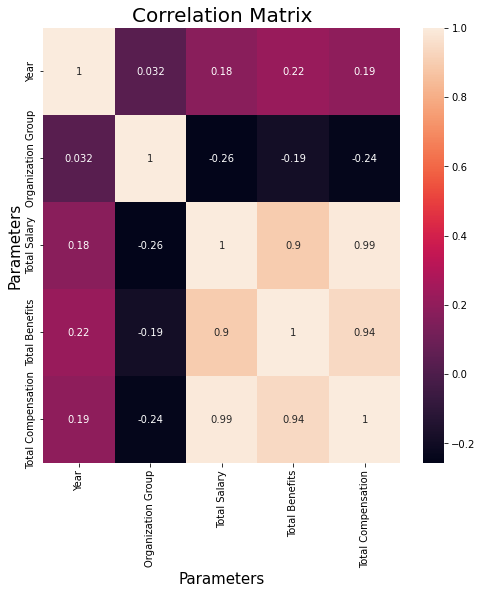

In [18]:
# compute the pair wise correlation for all columns 
plt.figure(figsize = (8, 8))
sns.heatmap(dataset.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.xlabel('Parameters', fontsize = 15) 
plt.ylabel('Parameters', fontsize = 15) 
plt.show()

# REGRESSION

We chose Multi Linear Regression Algorithm to do Regression as there are two independent variables involved in the regression

Text(0, 0.5, 'Total Compensation')

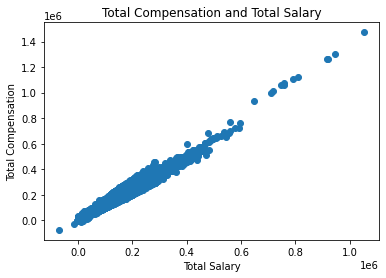

In [19]:
#since the correlation of our target variable Total Compensation is maximum with the Total Salary let us take a look at that feature for consideration
feature = dataset['Total Salary']
target = dataset['Total Compensation']
plt.scatter(feature,target, marker='o')
plt.title('Total Compensation and Total Salary')
plt.xlabel('Total Salary')
plt.ylabel('Total Compensation')

Text(0, 0.5, 'Total Compensation')

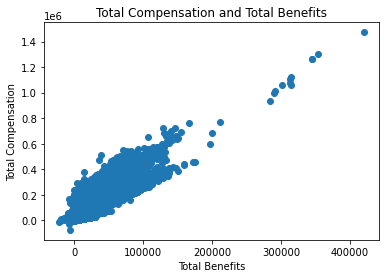

In [20]:
#since the correlation of our target variable Total Compensation is 2nd maximum with the Total Benefits let us take a look at that feature for consideration
feature = dataset['Total Benefits']
target = dataset['Total Compensation']
plt.scatter(feature,target, marker='o')
plt.title('Total Compensation and Total Benefits')
plt.xlabel('Total Benefits')
plt.ylabel('Total Compensation')

In [21]:
#data for preparation
#we are taking  BOTH VARIABLES for demonstrating MULTI linear regression for more accurate results as we have two independent variables

x_mlr = dataset[['Total Salary', 'Total Benefits']]
y_mlr = dataset['Total Compensation']


In [22]:
#import the sklearn for data set, linear regression model and also to split the train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(x_mlr, y_mlr, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(356857, 2)
(89215, 2)
(356857,)
(89215,)


In [24]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(X_train, Y_train)

LinearRegression()

In [25]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_mlr, mlr.coef_))

Intercept:  -1.0186340659856796e-10
Coefficients:


[('Total Salary', 1.000000000000001), ('Total Benefits', 1.0)]

# Prediction

In [26]:
#get the predicted variables and plot the regression line

Y_pred = mlr.predict(X_test)

#Predicted values
print("Prediction for test set:")
print(Y_pred)

Prediction for test set:
[119318.83 135321.62 207638.   ... 181448.76 114956.21 181446.07]


In [27]:
#performance of the linear model. Gives R2 score
print(mlr.score(X_test, Y_test))

1.0


In [28]:
print(mean_squared_error(Y_test,Y_pred))

4.0573409661144984e-21


# Classification

In [29]:
#import the sklearn for logistic regression model building,prediction and performance evaluation purposes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

In [30]:
x_log = dataset[['Total Benefits','Total Salary']]
y_log = dataset['Organization Group']
#80% is train data and 20% is test data
X_train,X_test,y_train,y_test=train_test_split(x_log,y_log,test_size=0.2,random_state=5)

In [31]:
# instantiate the model (using the default parameters)
logistic_regression = LogisticRegression()

# fit the model with data
logistic_regression.fit(X_train,y_train)

C:\Users\16479\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
#Do the prediction for the test data
y_pred=logistic_regression.predict(X_test)

In [33]:
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

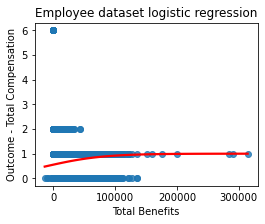

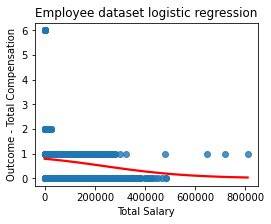

In [86]:
#visualising the graph of every variable against the outcome variable
plt.figure(0, figsize=(4, 3))
plt.title("Employee dataset logistic regression")
plt.xlabel('Total Benefits')
ax=sns.regplot(x=X_test['Total Benefits'], y=y_pred, data=dataset, logistic=True,ci=None,line_kws={'color':'red'})
ax.set(xlabel='Total Benefits',ylabel='Outcome - Total Compensation')
plt.show()

plt.figure(1, figsize=(4, 3))
plt.title("Employee dataset logistic regression")
plt.xlabel('Total Salary')
ax=sns.regplot(x=X_test['Total Salary'], y=y_pred, data=dataset, logistic=True,ci=None,line_kws={'color':'red'})
ax.set(xlabel='Total Salary',ylabel='Outcome - Total Compensation')
plt.show()

In [87]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10712  6792    64     0     0     0    12]
 [ 4748 24022   107     0     0     0     8]
 [ 1017  7046    17     0     0     0     2]
 [ 6538 12667   131     0     0     0     4]
 [ 2059  5314    19     0     0     0     0]
 [ 1917  5919    16     0     0     0     1]
 [   30    50     3     0     0     0     0]]


Text(0.5, 15.0, 'Predicted label')

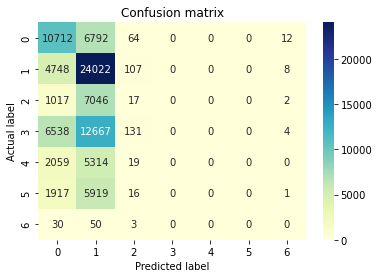

In [88]:
#visualising the confusion matrix by creatig a heatmap

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [89]:
#Looking at the performance of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3895196996020848


# ANOTHER THREE ALGO

# POLYNOMIAL REGRESSION

In [90]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [91]:
x_poly = dataset[['Total Benefits','Total Salary']]

y_poly = dataset['Total Compensation']

#Split the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(x_poly, y_poly, test_size = 0.2)

In [92]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [93]:
transformer.fit(X_train)

PolynomialFeatures(include_bias=False)

In [94]:
X_train = transformer.transform(X_train)

In [95]:
X_test = transformer.transform(X_test)

In [96]:
model = LinearRegression().fit(X_train, Y_train)

In [97]:
y_pred = model.predict(X_test)

In [98]:
y_pred

array([110495.71000065,  82340.30999994, 135012.1699981 , ...,
       156682.56000129, 223131.74000338, 257025.36000333])

In [99]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(model.score(X_test, y_pred))

1.0


# DECISION TREE CLASSIFIER

In [100]:
x_dt = dataset[['Total Compensation']]
y_dt = dataset['Organization Group']
X_train, X_test, Y_train, Y_test = train_test_split(x_dt, y_dt, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()   
dt_clf.fit(X_train,Y_train)

(356857, 1)
(89215, 1)
(356857,)
(89215,)


DecisionTreeClassifier()

In [101]:
y_predict = dt_clf.predict(X_test)

In [102]:
y_predict

array([1, 3, 1, ..., 0, 1, 0], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Y_test,y_predict)

0.26615479459732105

# Gaussian Naive Bayes Classification

In [104]:
x_rf = dataset[['Total Compensation']]
y_rf = dataset['Organization Group']

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(x_rf, y_rf, random_state=0)

In [106]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [107]:
y_pred=model.predict(X_test)

In [108]:
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.3599867285998673